# Nội dung thực hành

Yêu cầu: Thực hành truy vấn dữ liệu gồm 1 triệu ảnh trên MongoDB và thực hiện một số hàm hồi quy.					  
 - Lọc dữ liệu và tính toán khoảng cách với hàm Haversine Distance Calculation.  
 - Vẽ đồ thị từ dữ liệu truy vấn với Matplotlib và NumPy.  
 - Xây dựng hàm hồi quy tuyến tính với SciPy.  
 - Test với các hàm hồi quy logarit, hàm lượng giác, hàm lũy thừa, hàm Gauss, và đường cong Lorenz.  

Tài liệu tham khảo:  
 - https://thedatafrog.com/en/articles/mongodb-python-pandas/  
 - https://www.openlayer.com/blog/post/10-examples-of-using-python-for-big-data-analysis (phải điều chỉnh lại theo CSDL MongoDB).

Các nội dung 1, 2, 3 và nội dung truy vấn 1 triệu ảnh đã thực hiện từ buổi trước (xem lại file buổi trước)

# Lọc dữ liệu và tính toán khoảng cách với hàm Haversine Distance Calculation.

Đã thực hành -> xem lại file buổi trước

# Vẽ đồ thị từ dữ liệu truy vấn với Matplotlib và NumPy.

Đã thực hành -> xem lại file buổi trước

# Xây dựng hàm hồi quy tuyến tính với SciPy.

Đã thực hành -> xem lại file buổi trước

# Test với các hàm hồi quy logarithm, hàm lượng giác, hàm lũy thừa, hàm Gauss, và đường cong Lorenz.

## Hồi quy Logistic

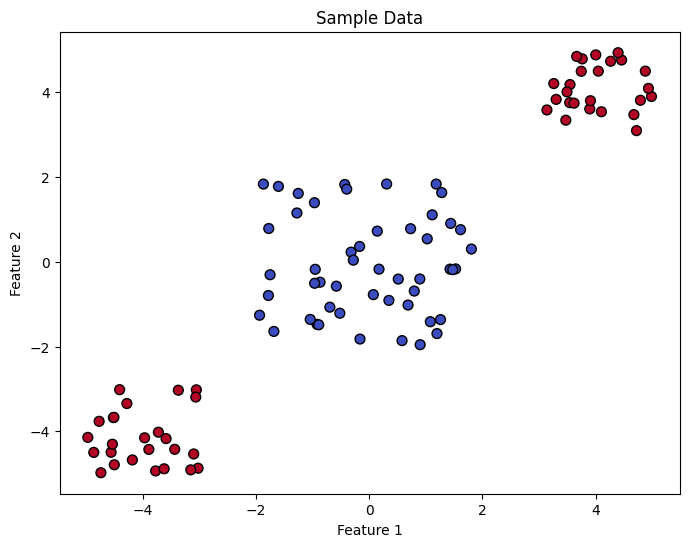

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu cho hai lớp
# Lớp 0: các điểm có tọa độ ngẫu nhiên nằm trong khoảng [-2, 2] trên cả hai trục
X_class0 = np.random.uniform(low=-2, high=2, size=(50, 2))

# Lớp 1: các điểm có tọa độ ngẫu nhiên nằm ngoài khoảng [-2, 2] trên cả hai trục
X_class1 = np.random.uniform(low=-5, high=-3, size=(25, 2))
X_class2 = np.random.uniform(low=3, high=5, size=(25, 2))
X_class = np.concatenate((X_class1, X_class2), axis=0)

# Gán nhãn cho các điểm dữ liệu
y_class0 = np.zeros(50)
y_class1 = np.ones(50)
y = np.concatenate((y_class0, y_class1), axis=0)

# Kết hợp dữ liệu từ hai lớp
X = np.concatenate((X_class0, X_class), axis=0)

# Vẽ dữ liệu mẫu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Data')
plt.show()


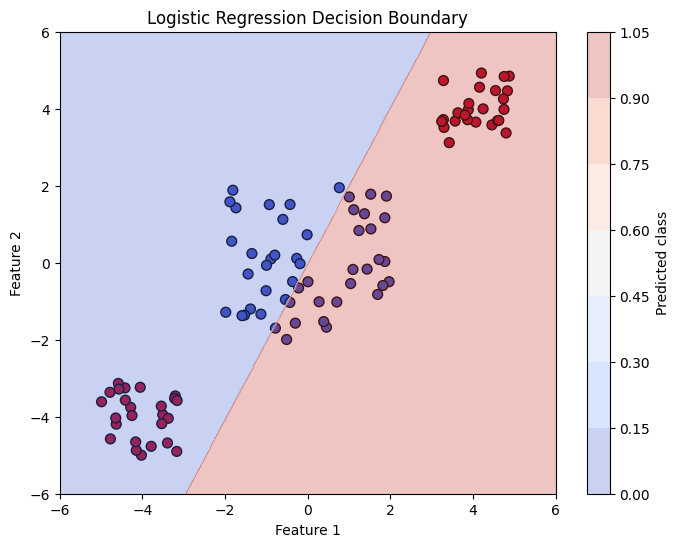

In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu cho hai lớp
# Lớp 0: các điểm có tọa độ ngẫu nhiên nằm trong khoảng [-2, 2] trên cả hai trục
X_class0 = np.random.uniform(low=-2, high=2, size=(50, 2))

# Lớp 1: các điểm có tọa độ ngẫu nhiên nằm ngoài khoảng [-2, 2] trên cả hai trục
X_class1 = np.random.uniform(low=-5, high=-3, size=(25, 2))
X_class2 = np.random.uniform(low=3, high=5, size=(25, 2))
X_class = np.concatenate((X_class1, X_class2), axis=0)

# Gán nhãn cho các điểm dữ liệu
y_class0 = np.zeros(50)
y_class1 = np.ones(50)
y = np.concatenate((y_class0, y_class1), axis=0)

# Kết hợp dữ liệu từ hai lớp
X = np.concatenate((X_class0, X_class), axis=0)

# Sử dụng Logistic Regression
# model = LogisticRegression()
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Vẽ dữ liệu và đường biên quyết định
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Tạo lưới để vẽ đường biên quyết định
xx, yy = np.meshgrid(np.linspace(-6, 6, 500), np.linspace(-6, 6, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Vẽ đường biên quyết định
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.colorbar(label="Predicted class")

plt.title("Logistic Regression Decision Boundary")
plt.show()

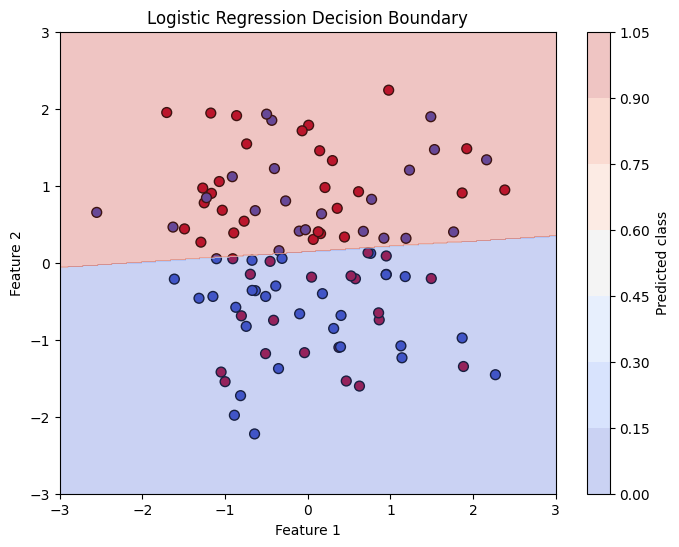

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Tạo dữ liệu mẫu
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, 100)

# Khởi tạo và huấn luyện mô hình hồi quy logistic
model = LogisticRegression()
model.fit(X, y)

# Vẽ dữ liệu và đường biên quyết định
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Tạo lưới để vẽ đường biên quyết định
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Vẽ đường biên quyết định
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.colorbar(label="Predicted class")

plt.title("Logistic Regression Decision Boundary")
plt.show()

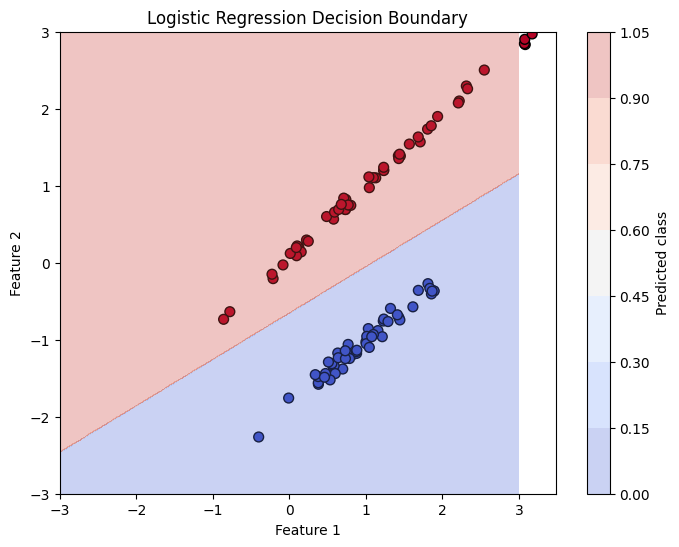

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Tạo dữ liệu mẫu với 2 đặc trưng và 2 lớp
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Khởi tạo và huấn luyện mô hình hồi quy logistic
model = LogisticRegression()
model.fit(X, y)

# Vẽ dữ liệu và đường biên quyết định
plt.figure(figsize=(8, 6))  # Tạo một hình vẽ mới với kích thước là 8x6 inches.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors="k")  # Vẽ dữ liệu dưới dạng các điểm phân tán trên đồ thị. X[:, 0] và X[:, 1] là hai đặc trưng của dữ liệu. c=y sử dụng màu sắc để biểu diễn nhãn của mỗi điểm dữ liệu, với màu được chọn từ bản đồ màu coolwarm. s=50 đặt kích thước của các điểm là 50. edgecolors="k" đặt màu viền của các điểm là màu đen.
plt.xlabel("Feature 1") # Đặt nhãn cho trục x và trục y là "Feature 1" và "Feature 2" tương ứng.
plt.ylabel("Feature 2")

# Tạo lưới để vẽ đường biên quyết định
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))  # Tạo một lưới 2D với các giá trị từ -3 đến 3 trên cả hai trục, với 500 điểm cho mỗi trục.
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    # Dự đoán nhãn của từng điểm trên lưới bằng cách sử dụng mô hình hồi quy logistic đã được huấn luyện (model) trên các giá trị trên lưới.

# Vẽ đường biên quyết định
Z = Z.reshape(xx.shape) # Định hình lại ma trận dự đoán Z thành hình dạng của lưới.
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)    # Vẽ đường biên quyết định dưới dạng các vùng màu, trong đó màu sắc được chọn từ bản đồ màu coolwarm. Các vùng được xác định bởi ma trận dự đoán Z.
plt.colorbar(label="Predicted class")   # Tạo thanh màu để hiển thị giá trị của nhãn dự đoán, với nhãn là "Predicted class".

plt.title("Logistic Regression Decision Boundary")
plt.show()

## Hàm logarithm

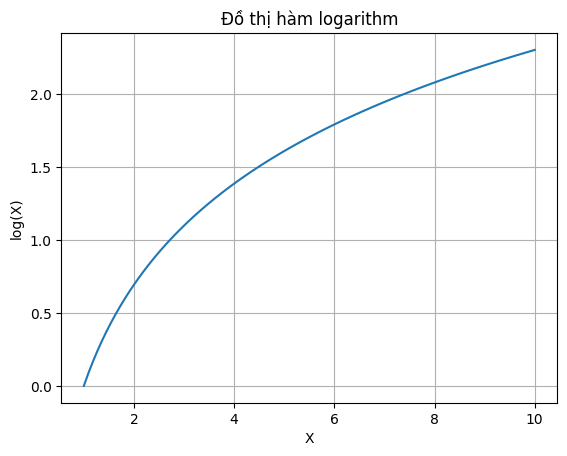

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
X = np.linspace(1, 10, 100)
Y = np.log(X)

# Vẽ đồ thị
plt.plot(X, Y)
plt.title('Đồ thị hàm logarithm')
plt.xlabel('X')
plt.ylabel('log(X)')
plt.grid(True)
plt.show()

## Hàm lượng giác

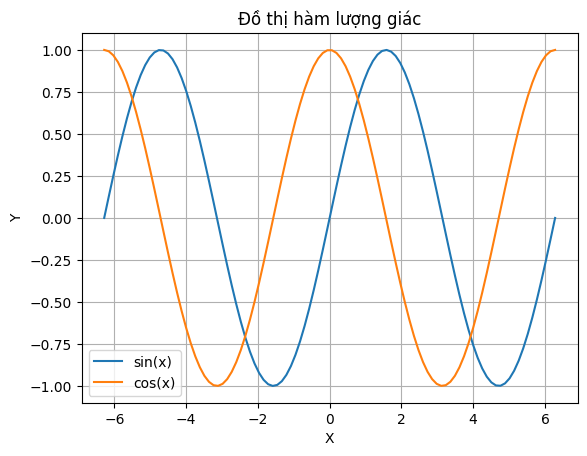

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
X = np.linspace(-2*np.pi, 2*np.pi, 100)
Y_sin = np.sin(X)
Y_cos = np.cos(X)

# Vẽ đồ thị
plt.plot(X, Y_sin, label='sin(x)')
plt.plot(X, Y_cos, label='cos(x)')
plt.title('Đồ thị hàm lượng giác')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## Hàm lũy thừa

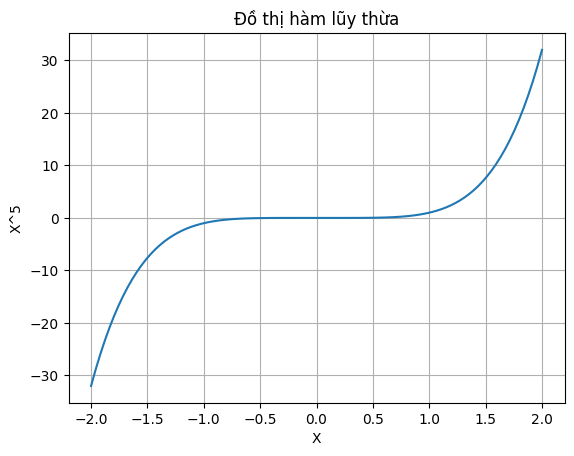

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
X = np.linspace(-2, 2, 100)
Y = X**5

# Vẽ đồ thị
plt.plot(X, Y)
plt.title('Đồ thị hàm lũy thừa')
plt.xlabel('X')
plt.ylabel('X^5')
plt.grid(True)
plt.show()


## Hàm Gauss (phân phối chuẩn)

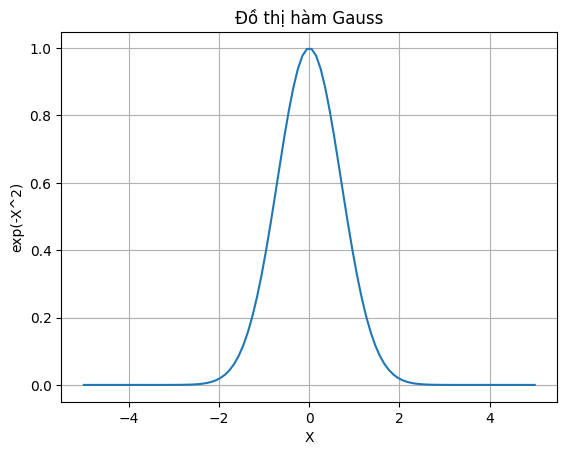

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
X = np.linspace(-5, 5, 100)
Y = np.exp(-X**2)

# Vẽ đồ thị
plt.plot(X, Y)
plt.title('Đồ thị hàm Gauss')
plt.xlabel('X')
plt.ylabel('exp(-X^2)')
plt.grid(True)
plt.show()

## Đường cong Lorenz

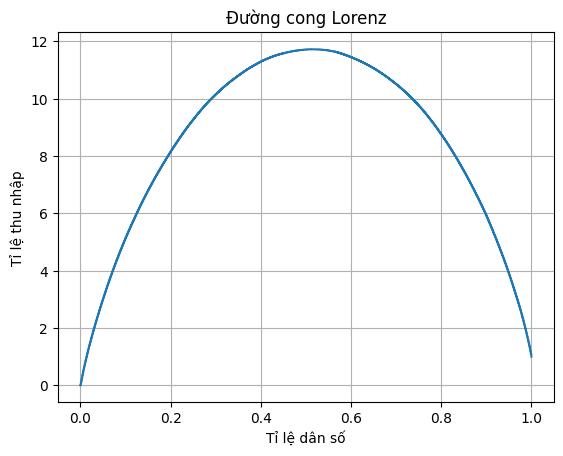

In [11]:
import numpy as np
import matplotlib.pyplot as plt


def lorenz_curve(y):
    n = len(y)
    sorted_y = np.sort(y)
    cumsum = np.cumsum(sorted_y)
    Lorenz = cumsum / cumsum[n - 1]
    Lorenz = np.insert(Lorenz, 0, 0)
    Lorenz[0], Lorenz[-1]
    return Lorenz


# Tạo dữ liệu mẫu
income = np.random.normal(0, 1, 1000)

# Vẽ đường cong Lorenz
Lorenz = lorenz_curve(income)
plt.plot(np.linspace(0, 1, len(Lorenz)), Lorenz, drawstyle="steps-post")
plt.title("Đường cong Lorenz")
plt.xlabel("Tỉ lệ dân số")
plt.ylabel("Tỉ lệ thu nhập")
plt.grid(True)
plt.show()

Đường cong Lorenz được sử dụng để mô tả phân phối của một biến trong dân số, thường được áp dụng trong lĩnh vực kinh tế để phân tích phân phối thu nhập. Đường cong Lorenz được vẽ bằng cách sắp xếp các giá trị của biến theo thứ tự tăng dần, sau đó tính tổng tích lũy của tỷ lệ giá trị tích lũy của biến so với tổng giá trị của biến. 

Trong đoạn code trên:

- `income`: là một mẫu dữ liệu về thu nhập của một dân số, được tạo ngẫu nhiên theo phân phối chuẩn (normal distribution).
- `lorenz_curve(y)`: là hàm để tính toán đường cong Lorenz cho một tập dữ liệu `y`.
- `Lorenz = lorenz_curve(income)`: tính toán đường cong Lorenz cho dữ liệu thu nhập.
- `plt.plot(np.linspace(0,1,len(Lorenz)), Lorenz, drawstyle='steps-post')`: vẽ đường cong Lorenz với trục x là tỉ lệ dân số và trục y là tỉ lệ thu nhập tích lũy.
- Các lệnh còn lại là để đặt tiêu đề và nhãn cho đồ thị.

Đường cong Lorenz được sử dụng để đánh giá sự phân phối không đồng đều của một biến trong dân số. Nó thường được so sánh với đường chéo (đường thẳng từ gốc đến góc phải trên của đồ thị), biểu thị phân phối thu nhập hoàn hảo. Một đường cong Lorenz càng gần với đường chéo thì sự phân phối càng công bằng, và ngược lại, nếu đường cong Lorenz càng xa khỏi đường chéo thì sự phân phối càng không công bằng.